# Open multiple files as single dataset

`xarray.open_mfdataset`

It is necessary to install `dask`

In [1]:
import xarray as xr
import os
import dask

C:\Users\Niccolo\Anaconda3\envs\geoframe_vicenza\lib\site-packages\xarray\core\merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
os.chdir(r'C:\Users\Niccolo\OMS\OMS_Project_FreThaw1D\output')

In [3]:
import glob
glob.glob('prova_*.nc')

['prova_double_0000.nc', 'prova_double_0001.nc', 'prova_double_0002.nc']

In [12]:
ds = xr.open_mfdataset('prova_*') 
ds.keys

<bound method Mapping.keys of <xarray.Dataset>
Dimensions:  (time: 43849, z: 464)
Coordinates:
  * z        (z) float64 0.08165 0.2625 0.4599 0.6553 ... 19.99 19.99 20.0 20.0
  * time     (time) datetime64[ns] 2000-01-01 2000-01-01T01:00:00 ... 2005-01-01
Data variables:
    T        (time, z) float64 dask.array<shape=(43849, 464), chunksize=(3001, 464)>
Attributes:
    Description_of_the_problem:            Thermal offset: spin-upHere water ...
    Top_boundary_condition:                Dirichlet
    Bottom_boundary_condition:             Neumann
    path_top_boundary_condition:           C:\Users\Niccolo\OMS\OMS_Project_F...
    path_bottom_boundary_condition:        C:\Users\Niccolo\OMS\OMS_Project_F...
    path_grid:                             C:\Users\Niccolo\OMS\OMS_Project_F...
    time_delta:                            3600 s
    sfcc_model:                            Dall'Amico et al.
    soil_thermal_conductivity_model:       Johansen
    interface_thermal_conductivity_model

In [8]:
ds.time.values[ds.time.size-1]

numpy.datetime64('2005-01-01T00:00:00.000000000')

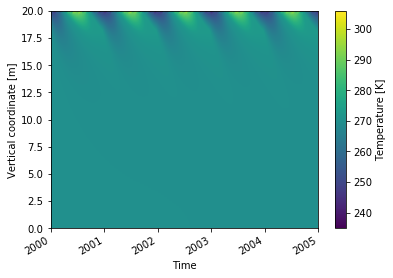

In [9]:
ds.T.plot(y='z')

In [16]:
with xr.open_dataset('prova_unico_0000.nc', engine='scipy') as ds_all:
    print(ds_all.keys)

<bound method Mapping.keys of <xarray.Dataset>
Dimensions:  (time: 43849, z: 464)
Coordinates:
  * z        (z) float64 0.08165 0.2625 0.4599 0.6553 ... 19.99 19.99 20.0 20.0
  * time     (time) datetime64[ns] 2000-01-01 2000-01-01T01:00:00 ... 2005-01-01
Data variables:
    T        (time, z) float64 ...
Attributes:
    Description_of_the_problem:            Thermal offset: spin-upHere water ...
    Top_boundary_condition:                Dirichlet
    Bottom_boundary_condition:             Neumann
    path_top_boundary_condition:           C:\Users\Niccolo\OMS\OMS_Project_F...
    path_bottom_boundary_condition:        C:\Users\Niccolo\OMS\OMS_Project_F...
    path_grid:                             C:\Users\Niccolo\OMS\OMS_Project_F...
    time_delta:                            3600 s
    sfcc_model:                            Dall'Amico et al.
    soil_thermal_conductivity_model:       Johansen
    interface_thermal_conductivity_model:  Arithmetic Mean
    state_equation:            

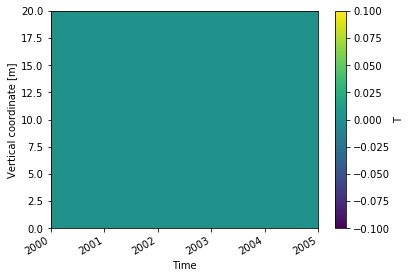

In [18]:
T_diff = ds.T - ds_all.T
T_diff.plot(y='z')

In [29]:
T_diff.values.max()

0.0

In [28]:
T_diff.values.min()

0.0